# Dimensionality Reduction With PCA

## Objective

In this lab, we'll explore how we can use PCA to reduce the dimensionality of our dataset by dropping Principal Components with that don't explain much of the variance in our dataset. 

## 1. A Quick Recap

Let's go back to the food price data example that we used in the first lab. We pasted the necessary code below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
% matplotlib inline

Now, read in the dataset stored in `foodusa.csv` and store it in a pandas DataFrame.  Be sure to set the `index_col` parameter to 0 for this dataset.  Then, display the head of the dataset to ensure everything loaded correctly. 

In [2]:
data = pd.read_csv('foodusa.csv', index_col=0)
data.head()

,Bread,Burger,Milk,Oranges,Tomatoes
City,,,,,
ATLANTA,24.5,94.5,73.9,80.1,41.6
BALTIMORE,26.5,91.0,67.5,74.6,53.3
BOSTON,29.7,100.8,61.4,104.0,59.6
BUFFALO,22.8,86.6,65.3,118.4,51.2
CHICAGO,26.7,86.7,62.7,105.9,51.2


In this lab, we'll be optimizing for using as little code as possible, so let's use scikit-learns `StandardScaler()` to get to the standardized data.  

In the cell below:

* Import `StandardScaler` from sklearn's `preprocessing` module
* Create a `StandardScaler()` object
* Use the scaler object's `fit_transform()` method on our `data` to create a scaled version of the dataset. 
* Store the transformed data in a new pandas DataFrame. 
* Our new DataFrame doesn't have column names, so fix this by setting `.columns` equal to a `list(data)`.

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_std = scaler.fit_transform(data)
data_std = pd.DataFrame(data_std)
data_std.columns = list(data)

Now, create a correlation matrix of our scaled DataFrame by using its `.corr()` method.  Then, display this correlation matrix in the cell under it. 

In [4]:
corr_mat = data_std.corr()

In [5]:
corr_mat

,Bread,Burger,Milk,Oranges,Tomatoes
Bread,1.000000,0.681700,0.328239,0.036709,0.382241
Burger,0.681700,1.000000,0.333422,0.210937,0.631898
Milk,0.328239,0.333422,1.000000,-0.002779,0.254417
Oranges,0.036709,0.210937,-0.002779,1.000000,0.358061
Tomatoes,0.382241,0.631898,0.254417,0.358061,1.000000


Now that we have a correlation matrix, we can easily compute the eigenvectors and eigenvalues for this dataset.  

In the cell below, use the correct function from numpy's `.linalg` module to get the eigenvalues and eigenvectors of the `corr_mat` variable.  Then, inspect the eigenvalues and eigenvectors in the following cells. 

In [6]:
eig_values, eig_vectors = np.linalg.eig(corr_mat)

In [7]:
eig_values

array([2.42246795, 1.10467489, 0.2407653 , 0.73848053, 0.49361132])

In [8]:
eig_vectors

array([[ 0.49614868,  0.30861972,  0.49989887,  0.38639398, -0.50930459],
       [ 0.57570231,  0.04380176, -0.77263501,  0.26247227,  0.02813712],
       [ 0.33956956,  0.43080905, -0.00788224, -0.83463952, -0.0491    ],
       [ 0.22498981, -0.79677694,  0.0059668 , -0.29160659, -0.47901574],
       [ 0.50643404, -0.28702846,  0.39120139,  0.01226602,  0.71270629]])

## 2. Visualizing how much information our PCs store.

Recall from the lecture how the sum of the eigenvalues

$$ \lambda_1 + \lambda_2 + \ldots + \lambda_5 $$ 

is equal to the sum of the variance of the variables, applied to this case:

$$ var(bread) + var(burger) + var(Milk) + var(Oranges) + var(Tomatoes)$$

with standardized data, we know that this sum is equal to the number of variables in the data set, which is 5 in this case. Now let's see if our eig_values add up to 5.

In the cell below, display the `sum()` of our eigenvalues. 

In [9]:
eig_values.sum()

4.999999999999999

Looks great!

Now we go into the essentials of PCA. for each principal component (defined by the eigenvectors), the amount of variance represented in this PC is reflected by its respective eigenvalue. So what we'll want to do is *keep* PCs with a high eigenvalue, and drop the ones with a low eigenvalue.

In the cell below, get a sorted version of the `eig_values` array, sorted from highest to loweset (hint: use the `reverse` keyword!)

In [10]:
eig_val_sorted = sorted(eig_values, reverse=True)

Now, let's `.plot()` our sorted array.

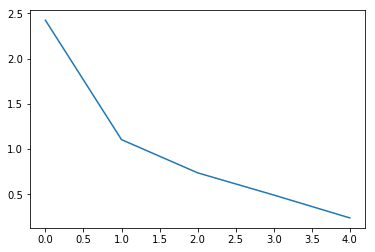

In [11]:
plt.plot(eig_val_sorted);

We can plot a cumulative plot representing how much variance is explained with each new eigenvalue or principal components.

In the cell below:

* calculate the total of `eig_val_sorted`
* get the `variance_explained` by dividing `eig_val_sorted` by the `total` we computed.
* get the cumulative variance by using numpy's `.cumsum()` method and passing in `variance explained`.
* inspect our `cum_variance` array to ensure that it is monotonically increasing, and that the final value is 1. 

In [12]:
total = sum(eig_val_sorted)
variance_explained = eig_val_sorted / total
cum_variance = np.cumsum(variance_explained)
cum_variance

array([0.48449359, 0.70542857, 0.85312468, 0.95184694, 1.        ])

Now, run the cell below to plot `cum_variance`, so that we can easily see how much of the variance is the data is explained with each additional principal component considered:

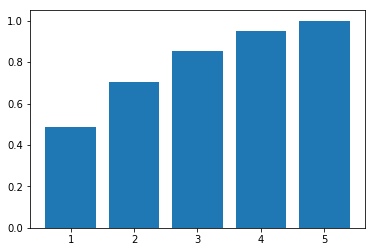

In [13]:
index = np.arange(len(cum_variance))+1
plt.bar(index, cum_variance);

Let's say we decided to keep the the PCs with an eigenvalue bigger than 1. This is a popular decision rule, which in this case leads to having 2 principal components. Let's see how we can do that and how to interpret all this, but first, let's move over to scikit learn. This library has very easy-to-use PCA capabilities, and very easy to use. Let's look at how it's done!

## 3. PCA in scikit learn

Sklearn makes it simple to use PCA on our data! 

In the cell below:

* Import `PCA` from sklearn's `.decomposition` module. 
* Create a `PCA()` object and set `n_components` equal to 5 (the number of columns in our dataset).
* `fit()` our pca object on our scaled data, which we stored in `data_std`.

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(data_std)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Now, get the eigenvalues from the `.explained_variance_` attribute.

In [15]:
pca.explained_variance_

array([2.53258013, 1.15488739, 0.77204783, 0.5160482 , 0.25170918])

Additionally, you can get the percentage of the variance explained by each component from the  `pca.explained_variance_ratio` attribute. Do this now in the cell below, and then inspect the array. 

In [16]:
exp_var_ratio = pca.explained_variance_ratio_
exp_var_ratio

array([0.48449359, 0.22093498, 0.14769611, 0.09872226, 0.04815306])

And finally, let's get the cumulative sum by using the array's `.cumsum()` method.

In [17]:
exp_var_ratio.cumsum()

array([0.48449359, 0.70542857, 0.85312468, 0.95184694, 1.        ])

Let's say we've decided to keep 2 Principal components. Conveniently, there is the arguments `n_components` in the `PCA` function. Additionally, as you saw, the eigenvalues are already sorted according to their size!

Run the cells below to get the first two principal components of our dataset using sklearn. 

In [18]:
from sklearn.decomposition import PCA
pca_2 = PCA(n_components=2)
pca_2.fit(data_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [19]:
eig_values = pca_2.explained_variance_

In [20]:
eig_vectors = pca_2.components_
eig_vectors

array([[ 0.49614868,  0.57570231,  0.33956956,  0.22498981,  0.50643404],
       [ 0.30861972,  0.04380176,  0.43080905, -0.79677694, -0.28702846]])

As seen before, 70% of the variance in the data can still be explained by just having the 2 principal components that replace the 5 variables!

## 4. Relationship with the original variables

Let's store the loadings of the principal components in `pc1` and `pc2`.

The components themselves are stored sequentially in an array within the pca object's `components_` attribute. 

In the cell below, slice the first and second principal components and store them within the appropriate variables in the cell below.

In [21]:
pc1 = pca_2.components_[0]
pc2 = pca_2.components_[1]

Now, let's get the structure loadings for each component, and store them in a pandas series, so that we can add our original labels back in. 

In the cell below:

* compute `structure_loading_1` by multiplying `pc1` times the square root of the corresponding eigenvalue, which can be found in `eig_values[0]`.  (hint: use `np.sqrt()` to make this easy!)
* Store `structure_loading_1` in a pandas Series, and set the `index` parameter to `data.columns`.
* Run the following cell to inspect the loadings for pc1 in descending order. 

In [22]:
structure_loading_1 = pc1* np.sqrt(eig_values[0])
str_loading_1 = pd.Series(structure_loading_1, index=data.columns)

In [23]:
str_loading_1.sort_values(ascending=False)

Burger      0.916177
Tomatoes    0.805943
Bread       0.789575
Milk        0.540394
Oranges     0.358051
dtype: float64

Now, repeat the process to get the structure loadings for the second principal component.

In [24]:
structure_loading_2 = pc2* np.sqrt(eig_values[1])
str_loading_2 = pd.Series(structure_loading_2, index=data.columns)

In [25]:
str_loading_2.sort_values(ascending=False)

Milk        0.462972
Bread       0.331660
Burger      0.047072
Tomatoes   -0.308457
Oranges    -0.856262
dtype: float64

**_NOTE:_** It doesn't really matter if a value is positive or negative--the magnitude is what matters when determining the importance.  Consequently, when we sort `str_loading_2` by value, we see "Oranges" at the very bottom.  although when we compare the magnitude of this to the others, we see that it's actually the most important category in this variable, not the least!

Let's see if we can interpret our principal components, and figure out what real-world things they correspond to!

Run the cell below to print the head of the `data` DataFrame again. 

In [26]:
data.head()

,Bread,Burger,Milk,Oranges,Tomatoes
City,,,,,
ATLANTA,24.5,94.5,73.9,80.1,41.6
BALTIMORE,26.5,91.0,67.5,74.6,53.3
BOSTON,29.7,100.8,61.4,104.0,59.6
BUFFALO,22.8,86.6,65.3,118.4,51.2
CHICAGO,26.7,86.7,62.7,105.9,51.2


Let's try to interpret what each principal component stands for. You can argue that PC1 represents bread and burgers, let's say "processed foods". PC2 represents oranges and milk, let's call that PC the "non-processed foods". Again, note that both strongly positive and strongly negative PCs are the most important--it's the strength, not the sign, that matters here!

# 5. The new data

What you'll usually want to do is replace your 5 columns with the new data. Now, what does the new data look like? You'll need to transform your columns using the loadings used in your eigenvectors. Let's try and find the PC1 value for Atlanta!

First, let's select the attribute values for Atlanta. We'll need to use the **standardized** values as this is the data we used to generate the PCs.

In [27]:
atlanta_var = data_std.loc[0]

In [28]:
atlanta_var

Bread      -0.322747
Burger      0.357765
Milk        1.707156
Oranges    -1.643751
Tomatoes   -0.963643
Name: 0, dtype: float64

Now we have to multiply this with our loadings vectors! Let's do this for both PCs.

In the cell below, get the `np.sum()` of `atlanta_var` multiplied by `pc1`.

In [29]:
np.sum(atlanta_var * pc1)

-0.2323147488693299

Now, do this again, but for `pc2`.

In [30]:
np.sum(atlanta_var * pc2)

2.2378185664644548

If we wanted to transform all of our data this way, we'd be here all day! Luckily, sklearn provides functionality that makes short work of this task. There is a method called `transform` in the PCA library that does this for all the observations in one step. 

Run the cells below to transform our city data!

In [31]:
PC_df = pd.DataFrame(pca_2.transform(data_std), index=data.index, columns=['PC1','PC2'])

In [32]:
PC_df

,PC1,PC2
City,,
ATLANTA,-0.232315,2.237819
BALTIMORE,0.288023,1.926235
BOSTON,2.298492,0.075243
BUFFALO,-0.348852,-1.129927
CHICAGO,0.116322,-0.088027
CINCINNATI,0.605998,0.461222
CLEVELAND,-1.242714,-1.335505
DALLAS,-1.121562,-0.859501
DETROIT,-0.280792,-1.347375


## Conclusion

You did it! PCA provides a great, intuitive way for us to transform our dataset into a format where the predictors are uncorrelated, as well as to reduce dimensionality by dropping less important components. 